<h1 style="text-align: center;">WSI - przeszukiwanie </h1>

### 1. Rysowanie wykresów funkcji f i g:

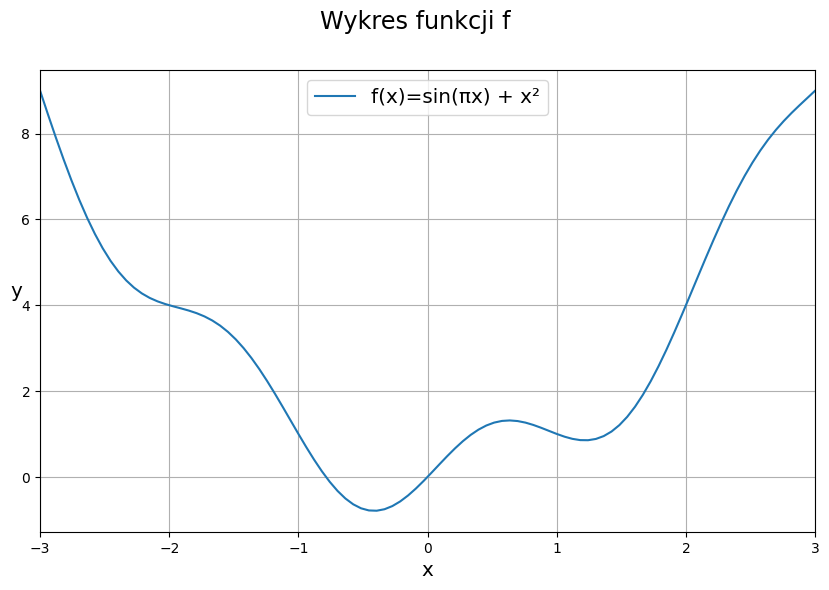

In [1]:
from matplotlib import pyplot as plt
from plotting import plot_2d
import numpy as np


def function_f(x):
    return np.sin(np.pi * x) + x**2

xf = np.linspace(-3, 3, 100)

plot_2d(xf, function_f, (-3, 3), "f(x)=sin(πx) + x²", "Wykres funkcji f")

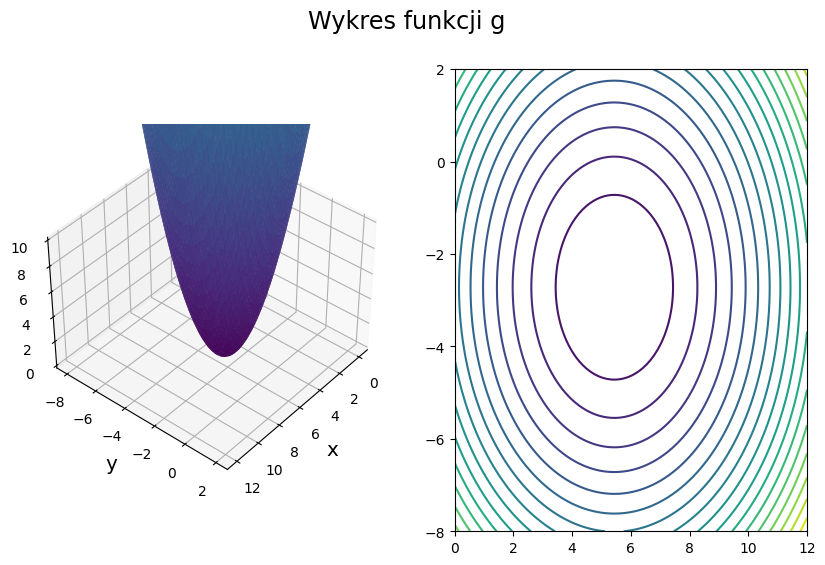

In [2]:
from plotting import plot_3d


def function_g(x1, x2):
    return 5*np.exp(2) - 4*np.exp(1)*x1 + x1**2 + 2*np.exp(1)*x2 + x2**2

xg = np.linspace(0, 12, 100)
yg = np.linspace(-8, 2, 100)

plot_3d(xg, yg, function_g, "Wykres funkcji g")

Łatwiejsza do optymalizacji będzie funkcja g, ponieważ posiada ona tylko jedno minimum lokalne będące równocześnie jej minimum globalnym. Funkcja f posiada dwa minima lokalne zatem znalezienie minimum globalnego będzie w dużej mierze zależało od wyboru punktu startowego. Optymalizując funkcję g, zakładając dobry wybór parametru kroku, zawsze znajdziemy jej minimum globalne.

### 2. Optymalizacja funkcji przy użyciu algorytmu najszybszego spadku:

Algorytm został zaimplementowany w pliku *gradien_descent.py*.


#### - Optymalizacja funcji f

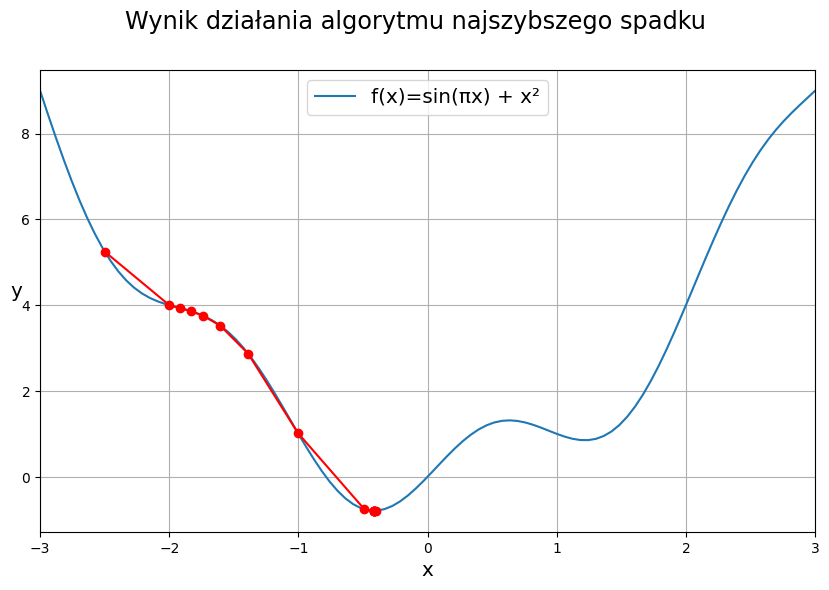

Minimum funkcji f: [-0.79233246], w punkcie x=[-0.41491162]


In [3]:
from gradient_descent import gradient_descent

STARTING_POINT = np.array([-2.5])
LEARNING_RATE = 0.1
PRECISION = 1e-6
MAX_ITERATIONS = 1000

def gradf(x):
    return  np.pi*np.cos(np.pi*x) + 2*x

minimum, all_points = gradient_descent(
    function_f, gradf, STARTING_POINT, LEARNING_RATE, PRECISION, MAX_ITERATIONS
    )

plot_2d(xf, function_f, (-3, 3), "f(x)=sin(πx) + x²", "Wynik działania algorytmu najszybszego spadku", path_to_min=all_points)
print(f"Minimum funkcji f: {function_f(minimum)}, w punkcie x={minimum}")

#### - Optymalizacja funkcji g

[5.         5.08731273 5.15716292 5.21304306 5.25774718 5.29351048
 5.32212111 5.34500962 5.36332043 5.37796907 5.38968799 5.39906312
 5.40656323 5.41256332 5.41736338 5.42120344 5.42427548 5.42673312
 5.42869923 5.43027211 5.43153042 5.43253707 5.43334239 5.43398664
 5.43450204 5.43491437 5.43524422 5.43550811 5.43571922 5.43588811
 5.43602322 5.43613131 5.43621778 5.43628695 5.43634229 5.43638657
 5.43642198 5.43645032 5.43647299 5.43649112 5.43650563 5.43651723
 5.43652652 5.43653395 5.43653989 5.43654464 5.43654844 5.43655149
 5.43655392 5.43655587 5.43655743 5.43655867 5.43655967 5.43656047
 5.4365611  5.43656162 5.43656202 5.43656235 5.43656261 5.43656282
 5.43656299 5.43656312 5.43656323 5.43656331 5.43656338 5.43656344
 5.43656348 5.43656352 5.43656354 5.43656357]
[ 0.         -0.54365637 -0.97858146 -1.32652153 -1.60487359 -1.82755524
 -2.00570056 -2.14821681 -2.26222981 -2.35344022 -2.42640854 -2.4847832
 -2.53148292 -2.5688427  -2.59873053 -2.62264079 -2.641769   -2.65707156

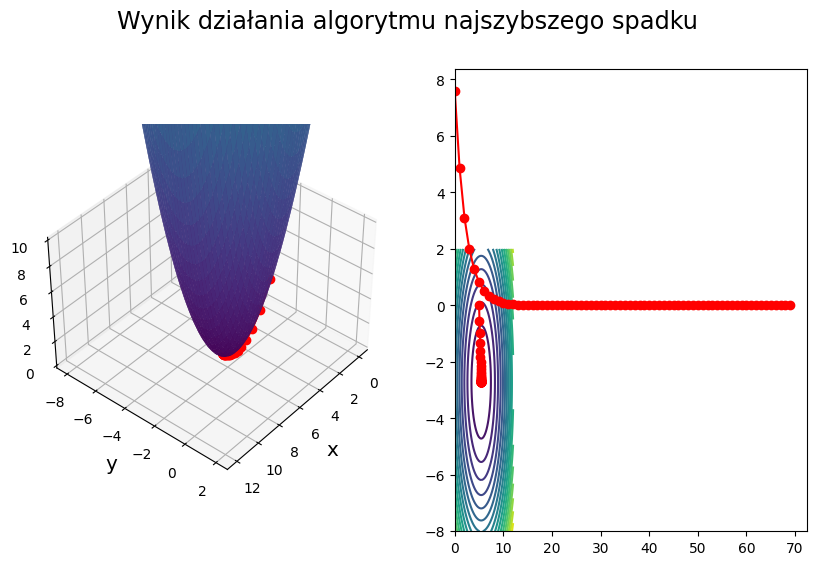

Minimum funkcji g: 2.0961010704922955e-13, w punkcie x = (5.436563585081341, -2.7182813811645317)
[[ 5.          0.        ]
 [ 5.08731273 -0.54365637]
 [ 5.15716292 -0.97858146]
 [ 5.21304306 -1.32652153]
 [ 5.25774718 -1.60487359]
 [ 5.29351048 -1.82755524]
 [ 5.32212111 -2.00570056]
 [ 5.34500962 -2.14821681]
 [ 5.36332043 -2.26222981]
 [ 5.37796907 -2.35344022]
 [ 5.38968799 -2.42640854]
 [ 5.39906312 -2.4847832 ]
 [ 5.40656323 -2.53148292]
 [ 5.41256332 -2.5688427 ]
 [ 5.41736338 -2.59873053]
 [ 5.42120344 -2.62264079]
 [ 5.42427548 -2.641769  ]
 [ 5.42673312 -2.65707156]
 [ 5.42869923 -2.66931362]
 [ 5.43027211 -2.67910726]
 [ 5.43153042 -2.68694217]
 [ 5.43253707 -2.6932101 ]
 [ 5.43334239 -2.69822445]
 [ 5.43398664 -2.70223592]
 [ 5.43450204 -2.70544511]
 [ 5.43491437 -2.70801245]
 [ 5.43524422 -2.71006633]
 [ 5.43550811 -2.71170943]
 [ 5.43571922 -2.71302391]
 [ 5.43588811 -2.71407549]
 [ 5.43602322 -2.71491676]
 [ 5.43613131 -2.71558977]
 [ 5.43621778 -2.71612818]
 [ 5.436286

In [4]:
STARTING_POINT = np.array([5, 0])
LEARNING_RATE = 0.1
PRECISION = 1e-6
MAX_ITERATIONS = 1000

def gradg(x1, x2):
    return np.array([-4*np.exp(1) + 2*x1, 2*np.exp(1) + 2*x2])

minimum, all_points = gradient_descent(
    function_g, gradg, STARTING_POINT, LEARNING_RATE, PRECISION, MAX_ITERATIONS
    )

plot_3d(xg, yg, function_g, "Wynik działania algorytmu najszybszego spadku", path_to_min=all_points)
print(f"Minimum funkcji g: {function_g(*minimum)}, w punkcie x = ({minimum[0]}, {minimum[1]})")
print(all_points)

### 3. Badanie wpływu rozmiaru kroku dla różnych punktów początkowych: